In [3]:
import starepandas
import datetime
import numpy
import pystare
import geopandas
import glob
import os
import re
import cartopy
import matplotlib.pyplot as plt
import matplotlib.tri as tri

ModuleNotFoundError: No module named 'cartopy'

# Explicit

In [ ]:
path = 'files/1C.F16.SSMIS.XCAL2016-V.20210110-S002714-E020909.088907.V05A.HDF5'
fname = path.split('/')[-1]
ds = starepandas.read_granule(path, latlon=True, sidecar=True)
df = ds['S3']

In [ ]:
df['pod'] = df.to_stare_resolution(resolution=4, clear_to_resolution=True)
grouped = df.groupby('pod')

In [ ]:
#Plotting size distribution

In [25]:
sdf = starepandas.STAREDataFrame(grouped.size()).reset_index().set_stare('pod').set_trixels()
sdf.set_geometry('trixels', inplace=True)

In [26]:
sdf

,pod,0,trixels
0,9007199254740996,1244,"MULTIPOLYGON (((28.67505 -47.09957, 28.67505 -..."
1,11258999068426244,1294,"MULTIPOLYGON (((28.67505 -31.39971, 23.61450 -..."
2,13510798882111492,1665,"MULTIPOLYGON (((18.06058 -38.92793, 23.01311 -..."
3,15762598695796740,1318,"MULTIPOLYGON (((23.61450 -35.27955, 23.01311 -..."
4,18014398509481988,1737,"MULTIPOLYGON (((28.67505 -15.69986, 24.29559 -..."
...,...,...,...
389,4532873024948404228,1120,"MULTIPOLYGON (((30.20648 2.50846, 36.20602 8.6..."
390,4535124824762089476,2592,"MULTIPOLYGON (((42.40566 14.77902, 34.54120 16..."
391,4537376624575774724,1633,"MULTIPOLYGON (((36.20602 8.69219, 34.54120 16...."
392,4557642822898941956,800,"MULTIPOLYGON (((39.42382 29.52474, 37.60681 36..."


<GeoAxesSubplot:>

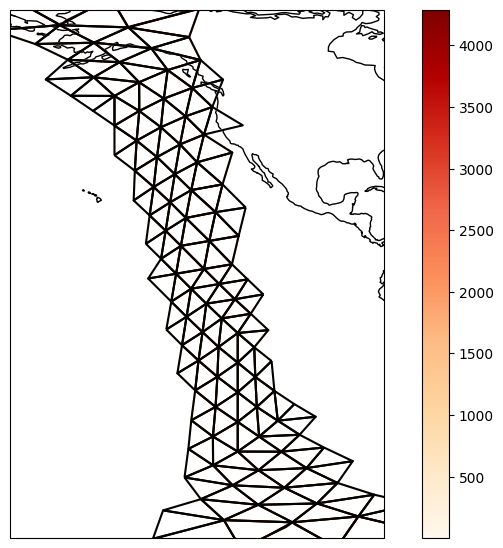

In [27]:
#proj = cartopy.crs.NearsidePerspective(central_longitude=-110, central_latitude=20)
proj = cartopy.crs.PlateCarree()
opts = {'projection': proj}

transf = cartopy.crs.Geodetic()

fig, ax = plt.subplots(figsize=(10,7), dpi=100, subplot_kw=opts)
ax.coastlines()
ax.set_xlim([-179, -80])
ax.set_ylim([-70, 70])

sdf.plot(ax=ax, column=0, transform=transf, boundary=False, legend=True, cmap='OrRd')
sdf.boundary.plot(ax=ax, transform=transf, color='black')

In [28]:
df['stare'] = df.hex()
df.set_stare('pod', inplace=True)
df['pod'] = df.hex()
df

,lat,lon,stare,timestamp,Tc1,Tc2,Tc3,Tc4,pod
0,-72.816711,-40.877533,0x1fe9350fd6ed418a,2021-01-10 00:27:16.000461,205.919998,244.559998,252.830002,255.089996,0x1fe8000000000004
1,-72.834869,-41.272217,0x1fe939940f2a21aa,2021-01-10 00:27:16.000461,206.889999,245.649994,255.669998,257.089996,0x1fe8000000000004
2,-72.853867,-41.666840,0x1fe92aeef1fae5ca,2021-01-10 00:27:16.000461,205.750000,248.229996,255.279999,256.309998,0x1fe8000000000004
3,-72.873711,-42.061432,0x1fe92fadfbedf6ca,2021-01-10 00:27:16.000461,208.910004,247.169998,252.759995,256.700012,0x1fe8000000000004
4,-72.894394,-42.455963,0x1fe92ea6e974e08a,2021-01-10 00:27:16.000461,209.889999,242.940002,255.270004,256.709991,0x1fe8000000000004
...,...,...,...,...,...,...,...,...,...
579775,-86.537971,-128.437225,0x1fb2e51d1f35b82a,2021-01-10 02:09:10.000288,197.119995,239.520004,241.149994,219.210007,0x1fb0000000000004
579776,-86.654663,-128.534302,0x1fb2fd4ce5b1f20a,2021-01-10 02:09:10.000288,196.820007,242.830002,236.130005,216.669998,0x1fb0000000000004
579777,-86.771416,-128.609772,0x1fb2fcf7d327818a,2021-01-10 02:09:10.000288,200.509995,237.750000,234.770004,213.309998,0x1fb0000000000004
579778,-86.888206,-128.661118,0x1fb2ee75cb3f264a,2021-01-10 02:09:10.000288,204.270004,238.639999,234.669998,215.279999,0x1fb0000000000004


In [10]:
key = list(grouped.groups.keys())[170]
#print(key)
grouped.get_group(key)

,lat,lon,stare,timestamp,Tc1,Tc2,Tc3,Tc4,pod
77,-76.554260,-70.953217,2272685927385475082,2021-01-10 00:27:16.000461,230.490005,239.699997,251.820007,254.320007,2272066012008415236
78,-76.631386,-71.336395,2272694294785019146,2021-01-10 00:27:16.000461,236.100006,243.119995,249.880005,254.899994,2272066012008415236
79,-76.709145,-71.719269,2272698888833291594,2021-01-10 00:27:16.000461,231.619995,244.160004,250.130005,256.920013,2272066012008415236
80,-76.787552,-72.101837,2272697800188454122,2021-01-10 00:27:16.000461,230.110001,239.479996,248.990005,254.179993,2272066012008415236
81,-76.866592,-72.484100,2272678772287514698,2021-01-10 00:27:16.000461,228.789993,243.679993,248.270004,257.570007,2272066012008415236
...,...,...,...,...,...,...,...,...,...
579680,-76.840340,-97.293701,2272379374318225706,2021-01-10 02:09:10.000288,225.839996,240.710007,250.289993,248.550003,2272066012008415236
579681,-76.919800,-97.675812,2272379959746714602,2021-01-10 02:09:10.000288,228.009995,238.589996,247.619995,245.449997,2272066012008415236
579682,-76.999886,-98.057556,2272361940860053930,2021-01-10 02:09:10.000288,225.029999,243.110001,246.889999,243.289993,2272066012008415236
579683,-77.080597,-98.438995,2272361494504892874,2021-01-10 02:09:10.000288,222.970001,238.750000,250.770004,245.919998,2272066012008415236


In [24]:
start=datetime.datetime.now()
#df['stare_group'] = df.to_stare_resolution(resolution=4, clear_to_resolution=True) 
grouped = df.groupby('stare_group')
for group in grouped.groups:
    g = grouped.get_group(group).drop(columns=['stare_group'], inplace=False)
g
print(datetime.datetime.now()-start)

0:00:00.501348


In [31]:
grouped = df.groupby(df.to_stare_resolution(resolution=4, clear_to_resolution=True) )
for group in grouped.groups:
    g = grouped.get_group(group)
g

,lat,lon,stare,timestamp,Tc1,Tc2,Tc3
189196,29.515692,39.320862,4575657659226476873,2021-01-10 01:33:47.000536,273.950012,245.429993,273.339996
189285,29.595991,39.136871,4575664951527247945,2021-01-10 01:33:49.000435,275.029999,245.610001,274.980011
189375,29.485401,39.114197,4575665534957492649,2021-01-10 01:33:51.000333,274.640015,245.520004,275.279999
189464,29.569330,38.936310,4575661400621221449,2021-01-10 01:33:53.000233,274.339996,245.699997,274.899994
189465,29.374802,39.091522,4575662418908688969,2021-01-10 01:33:53.000233,275.019989,244.889999,275.220001
...,...,...,...,...,...,...,...
193680,27.409195,36.450348,4575951177024226825,2021-01-10 01:35:22.000472,268.970001,251.250000,272.260010
193681,27.178045,36.510437,4575952871921244809,2021-01-10 01:35:22.000472,268.010010,247.350006,270.839996
193770,27.298780,36.429749,4575954516742775497,2021-01-10 01:35:24.000371,268.329987,248.449997,271.220001
193860,27.188419,36.409119,4575953410905237641,2021-01-10 01:35:26.000269,266.809998,244.970001,270.029999


# Functions

In [9]:
import multiprocessing
import itertools

def folder_to_pods(folder, pod_root, level, granule_pattern=''):
    granule_paths = sorted(glob.glob(os.path.expanduser(folder) + '/' + '*' ))
    pattern = '.*{}.*[^_stare]\.(nc|hdf|HDF5)'.format(granule_pattern)
    granule_paths = list(filter(re.compile(pattern).match, granule_paths))            
    for granule_path in granule_paths:        
        granule_to_pods(granule_path, pod_root, level)   
    
def granule_to_pods(granule_path, pod_root, level):
    granule_name = granule_path.split('/')[-1]
    ds = starepandas.read_granule(granule_path, latlon=True, sidecar=True)
    if isinstance(ds, dict):    
        for scan in ds:
            df = ds[scan]
            pod_name = scan + '.' + granule_name + '.pickle'
            starepandas.write_pods(df, pod_root, level, pod_name)            
    elif isinstance(ds, starepandas.STAREDataFrame):
        pod_name = granule_name + '.pickle'
        starepandas.write_pods(ds, pod_root, level, pod_name)            

In [10]:
folder_to_pods(folder='files/', pod_root='pods/', level=4, granule_pattern='SSMIS')